In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from subprocess import check_output

from skimage.io import imread
import io
import bson                       

import matplotlib.pyplot as plt
import multiprocessing as mp      


In [3]:
import pymongo
import pprint 
client=pymongo.MongoClient("localhost",27017)
db=client.asign_2
db.demo.find_one()  
p=pprint.PrettyPrinter(compact=True)
p.pprint(db.demo.find_one())

{'_id': 0,
 'category_id': 1000010653,
 'imgs': [{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01'
                      b'\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06'
                      b'\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c'
                      b'\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d'
                      b'\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),014'
                      b"44\x1f'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c"
                      b'\x18\r\r\x182!\x1c!222222222222222222222222222222222222'
                      b'22222222222222\xff\xc0\x00\x11\x08\x00\xb4\x00\xb4\x03'
                      b'\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00'
                      b'\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00'
                      b'\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05'
                      b'\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00'
                      b'\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x0

In [13]:
from bson.json_util import loads, dumps
record = db.demo.find()
json_str = dumps(record)
import json
json1=json.loads(json_str)
for i in range(0,len(json1)):
    json1[i]['product_id'] = json1[i].pop('_id')
json1[0]['imgs'][0]['picture']['$binary']

[{'imgs': [{'picture': {'$binary': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAC0ALQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKz9e1BtJ8P6jqKrua1tpJgvqVUkD9KAOd8T/ECDRdUXRdL0+fWdbZN5tLdgBEv96Rzwo/WsoeL/AB/j/kTNO/8ABuv/AMTWHoMln4P+HcvijUCbi9vYVv7y

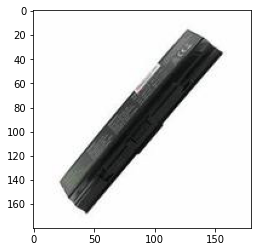

In [15]:
from skimage.io import imread
import pandas as pd

import base64
prod_to_category = dict()
z2=[]
f=0
for c, d in enumerate(json1):
    product_id = d['product_id']
    category_id = d['category_id'] # This won't be in Test data
    prod_to_category[product_id] = category_id
    for pic in d['imgs']:
        picture = imread(io.BytesIO(base64.b64decode(pic['picture']["$binary"])))
        z2.append(picture)
        pic.update(ImageName=f)
        f=f+1
        # do something with the picture, etc

prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
prod_to_category.index.name = '_id'
prod_to_category.rename(columns={'0': 'category_id'}, inplace=True)
prod_to_category.head()
plt.imshow(picture);
#extract and save imagees to specific file path
for i in range(0,len(z2)):
    plt.imsave('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/'+str(i)+'.jpg',z2[i])


In [8]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import glob
import ntpath
import cv2

from sklearn.metrics.pairwise import cosine_similarity
import scipy as sc

2.4.1


Founnd [110] images


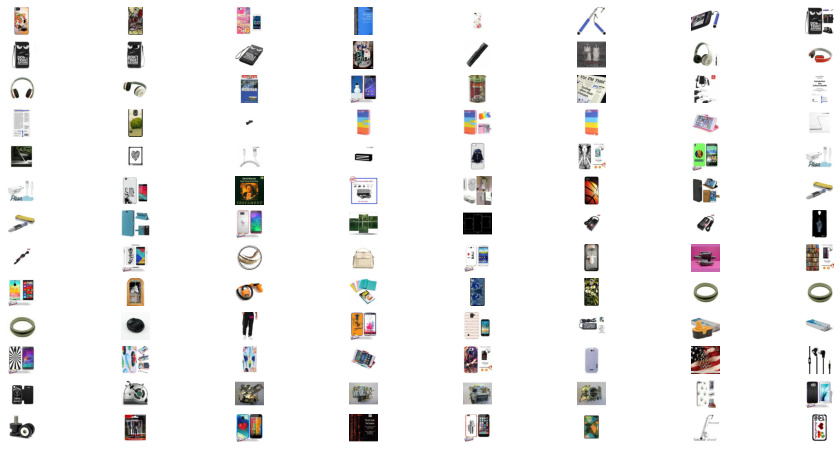

In [9]:
image_paths = glob.glob('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/*.jpg')

print(f'Founnd [{len(image_paths)}] images')

images = {}
for image_path in image_paths:
    image = cv2.imread(image_path, 3)
    b,g,r = cv2.split(image)           # get b, g, r
    image = cv2.merge([r,g,b])         # switch it to r, g, b
    image = cv2.resize(image, (200, 200))
    images[ntpath.basename(image_path)] = image      

n_col = 8
n_row = int(len(images)/n_col)
f, ax = plt.subplots(n_row, n_col, figsize=(16, 8))
for i in range(n_row):
    for j in range(n_col):
        ax[i, j].imshow(list(images.values())[n_col*i + j])
        ax[i, j].set_axis_off()

In [10]:
def load_image(image):
  image = plt.imread(image)
  img = tf.image.convert_image_dtype(image, tf.float32)
  img = tf.image.resize(img, [400, 400])
  img = img[tf.newaxis, :] # shape -> (batch_size, h, w, d)
  return img

# content layers describe the image subject
content_layers = ['block5_conv2'] 

# style layers describe the image style
# we exclude the upper level layes to focus on small-size style details
style_layers = [ 
        'block1_conv1',
        'block2_conv1',
        'block3_conv1', 
        #'block4_conv1', 
        #'block5_conv1'
    ] 

def selected_layers_model(layer_names, baseline_model):
  outputs = [baseline_model.get_layer(name).output for name in layer_names]
  model = Model([vgg.input], outputs)
  return model

# style embedding is computed as concatenation of gram matrices of the style layers
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

class StyleModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleModel, self).__init__()
    self.vgg =  selected_layers_model(style_layers + content_layers, vgg)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    # scale back the pixel values
    inputs = inputs*255.0
    # preprocess them with respect to VGG19 stats
    preprocessed_input = preprocess_input(inputs)
    # pass through the reduced network
    outputs = self.vgg(preprocessed_input)
    # segregate the style and content representations
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    # calculate the gram matrix for each layer
    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    # assign the content representation and gram matrix in
    # a layer by layer fashion in dicts
    content_dict = {content_name:value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content':content_dict, 'style':style_dict}

vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

def image_to_style(image_tensor):
    extractor = StyleModel(style_layers, content_layers)
    return extractor(image_tensor)['style']

def style_to_vec(style):
    # concatenate gram matrics in a flat vector
    return np.hstack([np.ravel(s) for s in style.values()]) 
    
# compute styles
image_style_embeddings = {}
for image_path in tqdm(image_paths): 
    image_tensor = load_image(image_path)
    style = style_to_vec( image_to_style(image_tensor) )
    image_style_embeddings[ntpath.basename(image_path)] = style


100%|██████████| 110/110 [01:48<00:00,  1.02it/s]


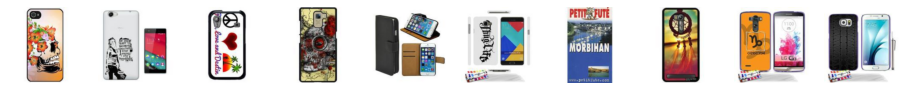

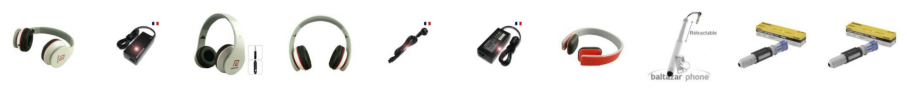

In [11]:
def search_by_style(reference_image, max_results=10):
    v0 = image_style_embeddings[reference_image]
    distances = {}
    for k,v in image_style_embeddings.items():
        d = sc.spatial.distance.cosine(v0, v)
        distances[k] = d

    sorted_neighbors = sorted(distances.items(), key=lambda x: x[1], reverse=False)
    
    f, ax = plt.subplots(1, max_results, figsize=(16, 8))
    for i, img in enumerate(sorted_neighbors[:max_results]):
        ax[i].imshow(images[img[0]])
        ax[i].set_axis_off()
    
    plt.show()

# images mostly match the reference style, although not perfectly
search_by_style('0.jpg')
search_by_style('15.jpg')

In [20]:
import json
with open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json', 'w', encoding='utf-8') as f:
    json.dump(json1, f, ensure_ascii=False, indent=4)

In [48]:
def match_id(filename):
    f = open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json',)
    data = json.load(f)
    #print(data[0]['imgs'][0]['ImageName'])
    for line in data:
        for img in line['imgs']:
            #print(type(img['ImageName']))
            if filename==img['ImageName']:
                #print(img)
                return line['product_id']
                break
                f.close()
print(match_id(0))

0


In [49]:
f = open('C:/Users/yashk/Desktop/ADM/Assignment/Assignment_3/pics/json1.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
print(data[0]['imgs'][0]['ImageName'])
# Iterating through the json
# list

  
# Closing file
f.close()

0
